In [70]:
data = """seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4"""

In [71]:
# with open(f'05.txt', 'r') as file:
#     data = file.read().strip()

In [72]:
seeds = data.split('\n\n')[0].split(': ')[-1].split()
seeds = [int(seed) for seed in seeds]

maps = data.split('\n\n')[1:]
maps = [item.split(':\n')[1] for item in maps]
maps = [item.split('\n') for item in maps]
maps = [[item.split() for item in map] for map in maps]
maps = [[[int(number) for number in item] for item in map] for map in maps]

In [73]:
def get_destination(number):
    for map in maps:
        for row in map:
            # imagining it flows left to right
            right_start, left_start, length = row
            if number in range(left_start, left_start+length):
                number = number - left_start + right_start
                break
    return number


min_lowest_location = None
for seed in seeds:
    location = get_destination(seed)
    if not min_lowest_location or location < min_lowest_location:
        min_lowest_location = location

# puzzle 1
min_lowest_location

35

In [74]:
from itertools import batched

seed_bands = [[start, start+count-1] for start, count in batched(seeds, 2)]

In [75]:
# seed -> destination (too slow, commented)

# seed_bands = [range(start, start+count-1) for start, count in batched(seeds, 2)]
# 
# min_lowest_location = None
# for seed_band in seed_bands:
#     for seed in seed_band:
#         location = get_destination(seed)
#         if not min_lowest_location or location < min_lowest_location:
#             min_lowest_location = location
# 
# min_lowest_location

In [76]:
def get_seed(number):
    for map in maps[::-1]:
        for row in map:
        # imagining it flows right to left
            right_start, left_start, length = row
            if number in range(right_start, right_start+length):
                number = number - right_start + left_start
                break
    return number

In [77]:
# destination -> seed

seed_bands = [range(start, start+count-1) for start, count in batched(seeds, 2)]


tentative = 0
while True:
    location = get_seed(tentative)
    if any([location in band for band in seed_bands]):
        break
    tentative += 1

tentative

46

In [78]:
def get_path(number):
    path = [number]
    for map in maps:
        for row in map:
            # imagining it flows left to right
            right_start, left_start, length = row
            if number in range(left_start, left_start+length):
                number = number - left_start + right_start
                break
        path.append(number)
    return path

paths = []
for band in seed_bands:
    for seed in band:
        paths.append(get_path(seed))

In [79]:
maps[0]

[[50, 98, 2], [52, 50, 48]]

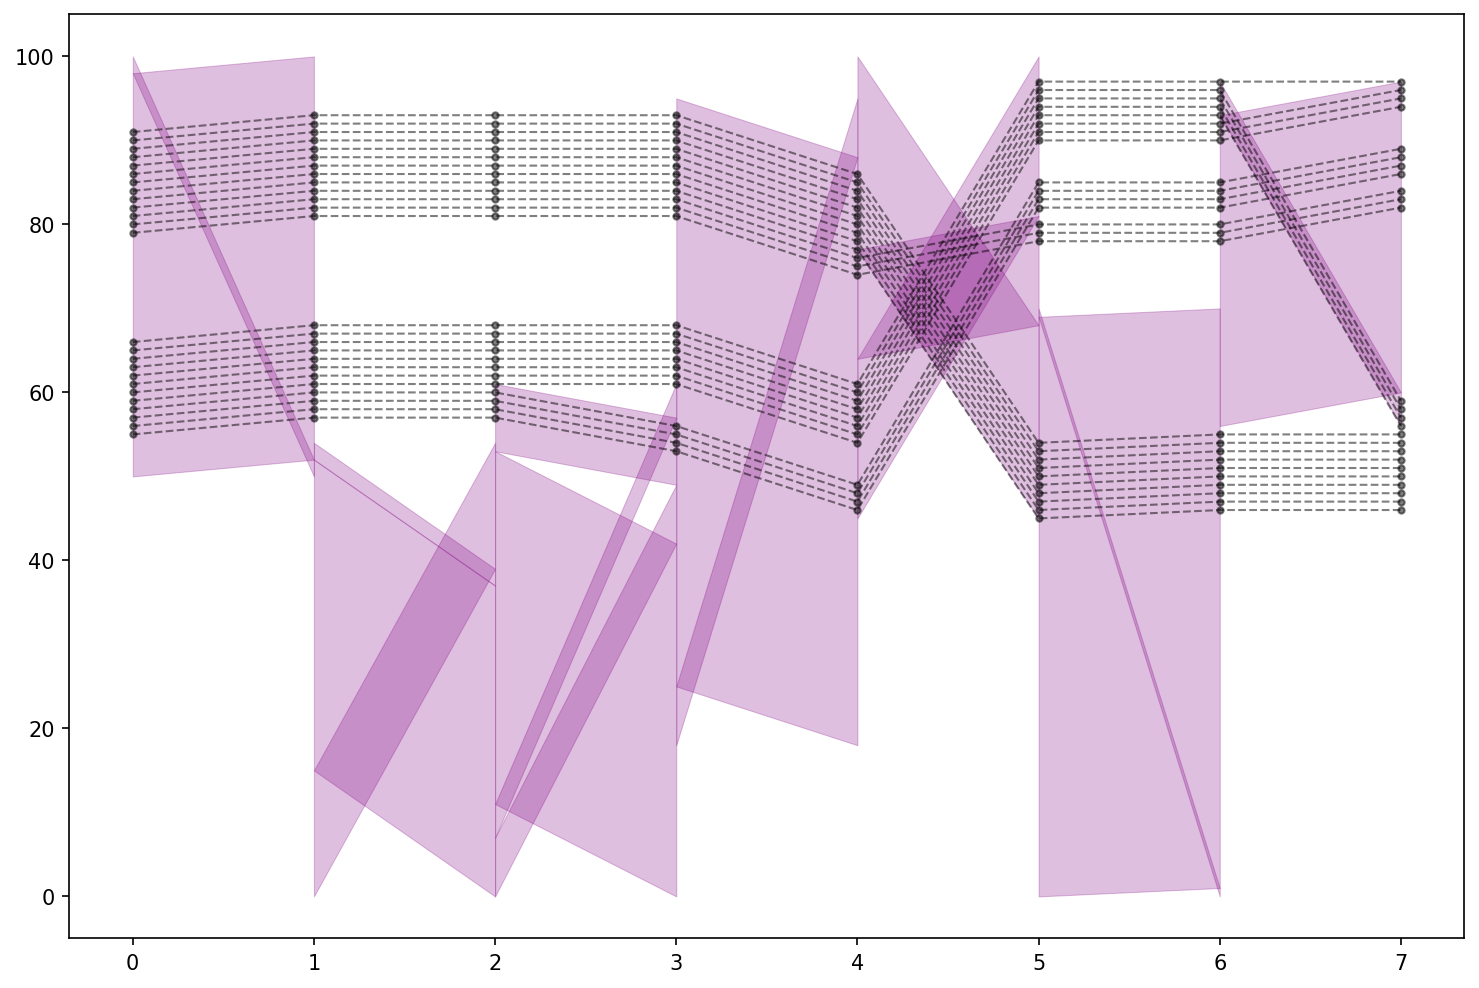

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi=150)

for path in paths:
    ax.plot(range(len(path)), path, c='black', ls='--', linewidth=1, marker='.', alpha=0.5)

all_tops = []
all_bottoms = []
for index, map in enumerate(maps):
    for row in map:
        right_start, left_start, length = row
        top = [left_start+length, right_start+length]
        bottom = [left_start, right_start]
        ax.fill_between([index, index+1], top, bottom, color='purple', linewidth=0.5, alpha=0.25)
        all_tops.append([index, top])
        all_bottoms.append([index, bottom])
    
plt.show()

In [81]:
# 171711457
# 2762480372
# 2378348772
# 3305534543
# 937987465
# 352628782
# 201778106
# 171711461
# 171711460
# 223523059
# 166086528
# 95885756
# 171330852

In [83]:
print(all_tops[::-1])
print(all_bottoms[::-1])


[[6, [97, 60]], [6, [93, 97]], [5, [69, 70]], [5, [70, 1]], [4, [77, 81]], [4, [64, 100]], [4, [100, 68]], [3, [95, 88]], [3, [25, 95]], [2, [11, 61]], [2, [7, 49]], [2, [53, 42]], [2, [61, 57]], [1, [15, 54]], [1, [54, 39]], [1, [52, 37]], [0, [98, 100]], [0, [100, 52]]]
[[6, [93, 56]], [6, [56, 60]], [5, [0, 1]], [5, [69, 0]], [4, [64, 68]], [4, [45, 81]], [4, [77, 45]], [3, [25, 18]], [3, [18, 88]], [2, [7, 57]], [2, [0, 42]], [2, [11, 0]], [2, [53, 49]], [1, [0, 39]], [1, [52, 37]], [1, [15, 0]], [0, [50, 52]], [0, [98, 50]]]
